In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('diabetes.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [7]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
model=KNeighborsClassifier(n_neighbors=10)

In [10]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [11]:
y_pred=model.predict(x_test)

In [12]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [13]:
cf=confusion_matrix(y_test,y_pred)

In [14]:
cf

array([[86, 13],
       [23, 32]], dtype=int64)

In [15]:
accuracy=accuracy_score(y_test,y_pred)

In [16]:
accuracy

0.7662337662337663

In [17]:
error=1-accuracy

In [18]:
error

0.23376623376623373

In [19]:
fpn=cf[0,1]+cf[1,0]

In [20]:
fpn

36

In [21]:
total=cf[0,0]+cf[0,1]+cf[1,0]+cf[1,1]

In [22]:
total

154

In [23]:
err=fpn/total

In [24]:
err

0.23376623376623376

In [25]:
pre=precision_score(y_test,y_pred)

In [26]:
pre

0.7111111111111111

In [27]:
precision=cf[1,1]/(cf[1,1]+cf[0,1])

In [28]:
precision

0.7111111111111111

In [29]:
re=recall_score(y_test,y_pred)

In [30]:
re

0.5818181818181818

In [31]:
recall=recall_score(y_test,y_pred)

In [32]:
recall

0.5818181818181818

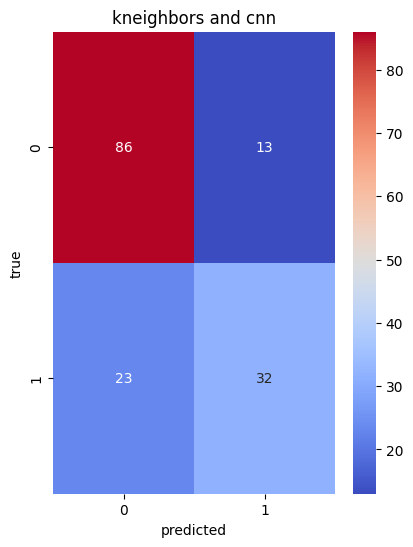

In [33]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.heatmap(cf,annot=True,cmap='coolwarm',fmt='d',cbar='False')
plt.title('kneighbors and cnn')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()